In [ ]:
# The data contains the following fields:

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("911.csv")
df=pd.DataFrame(data)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [153]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [154]:
len(df)

99492

In [155]:
# Top 5 zipcod for 911 calls

df.sort_values(['zip'], ascending=[False]).head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
67109,30.333596,-95.595595,8931; MONTGOMERY; Station 311; 2016-06-02 @ 1...,77316.0,EMS: CARDIAC EMERGENCY,2016-06-02 13:36:01,MONTGOMERY,8931,1
25715,32.387090,-86.276106,600 ; MONTGOMERY; 2016-02-12 @ 18:44:37;,36107.0,Traffic: DISABLED VEHICLE -,2016-02-12 18:47:01,MONTGOMERY,600,1
91947,40.295035,-75.581548,FAIRBROOK DR & LEIDY RD; NEW HANOVER; 2016-08-...,19525.0,Fire: CARBON MONOXIDE DETECTOR,2016-08-04 18:31:00,NEW HANOVER,FAIRBROOK DR & LEIDY RD,1
49809,40.310659,-75.539006,RENNINGER RD & BIG RD; NEW HANOVER; Station 3...,19525.0,EMS: FALL VICTIM,2016-04-16 23:37:00,NEW HANOVER,RENNINGER RD & BIG RD,1
16244,40.288105,-75.588739,BUCHERT RD & LEIDY RD; NEW HANOVER; Station 3...,19525.0,EMS: GENERAL WEAKNESS,2016-01-22 11:37:01,NEW HANOVER,BUCHERT RD & LEIDY RD,1


In [156]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [157]:
# Top 5 townships for 911 calls

df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [158]:
# unique values for "title" column

len(df['title'].unique())

110

In [159]:
df['title'].nunique()

110

In [160]:
# Split 'title' column into specified Reasons (EMS, Fire, Traffic), using apply() and lambda function.

df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [161]:
df['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

In [162]:
# Most common reason for 911 calls

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

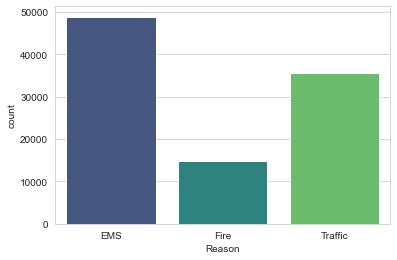

In [163]:
# Seaborn countplot of 911 calls by Reason

sns.countplot(x=df['Reason'], data=df, palette='viridis')

In [164]:
# Formatting 'timeStamp' column, using to_datetime

type(df['timeStamp'].iloc[0])

str

In [165]:
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [166]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y/%m/%d')

In [167]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [168]:
# Specific attributes from timeStamp, using apply() and lambda function

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [169]:
df['Day of Week'].head()

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [170]:
# Getting actual string name of the day of the week, using map()

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [171]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [172]:
df['Day of Week']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: Day of Week, Length: 99492, dtype: object

In [173]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


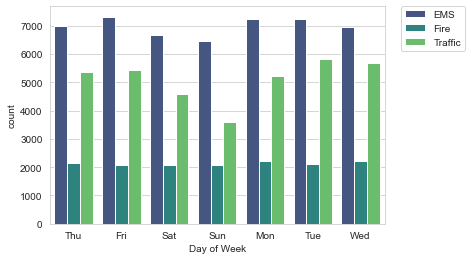

In [174]:
# Seaborn countplot of the Day of the Week column with the hue based off of the Reason column

sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

plt.legend(loc=2, bbox_to_anchor=(1.05,1), borderaxespad=0.)

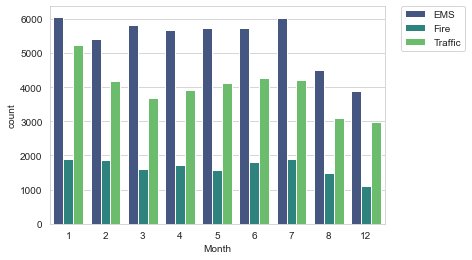

In [175]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')
plt.legend(loc=2, bbox_to_anchor=(1.05,1),borderaxespad=0)

In [176]:
np.isnan(df['Month']).sum()

0

In [177]:
df['Month'].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [178]:
# Aggregate the Month column using groupby()

byMonth = df.groupby('Month').count()

In [179]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


In [180]:
df.count()

lat            99492
lng            99492
desc           99492
zip            86637
title          99492
timeStamp      99492
twp            99449
addr           98973
e              99492
Reason         99492
Hour           99492
Month          99492
Day of Week    99492
dtype: int64

<AxesSubplot:xlabel='Month'>

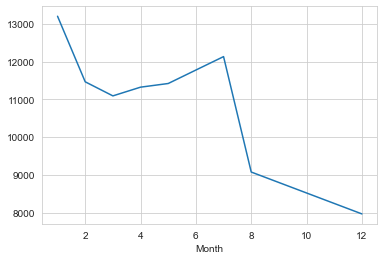

In [181]:
# Count of calls per month

byMonth['twp'].plot()

In [182]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


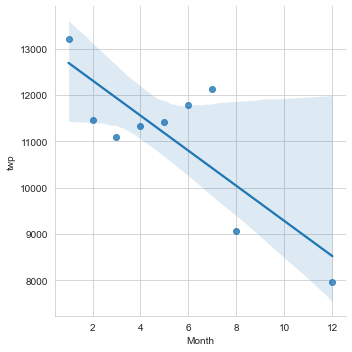

In [183]:
# Month by twp using Seaborn lmplot

sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [184]:
# Creating 'Date' column from the timeStamp column, using apply() and lambda function

t= df['timeStamp'].iloc[0]

In [185]:
df['Date'] = df['timeStamp'].apply(lambda t: t.date() )

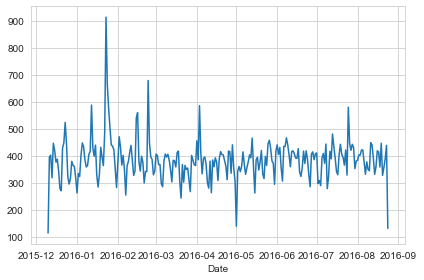

In [187]:
# Group by the Date column and count lattitude with count() aggregate

df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

In [188]:
# Date by count twp per each Reason

df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

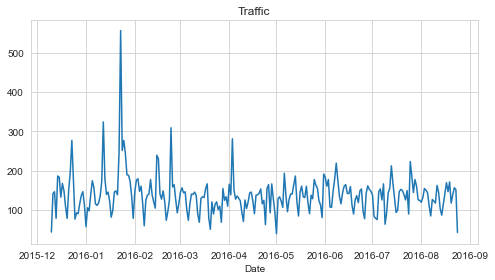

In [189]:
sns.set_style('whitegrid')
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot(figsize=(7,4))
plt.title('Traffic')
plt.tight_layout()

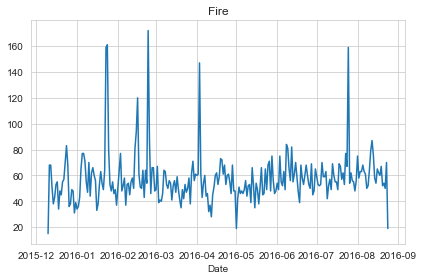

In [190]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

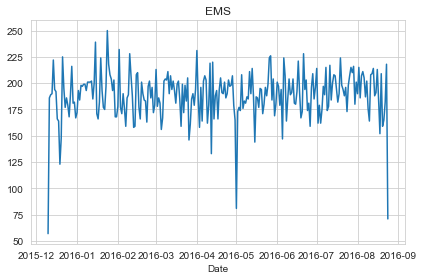

In [191]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [192]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [203]:
# Creating a new DataFrame of Day of week by Hour and count Reason to create a Seaborn heatmap

df2=df.groupby(by=['Day of Week', 'Hour']).count()['Reason'].unstack()
df2.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

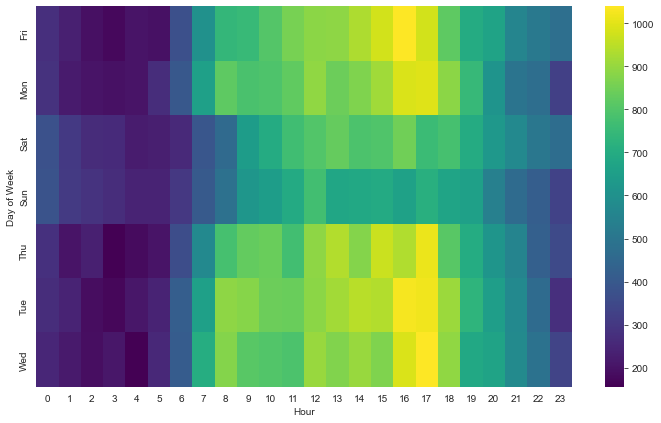

In [210]:
plt.figure(figsize=(12,7))
sns.heatmap(df2, cmap='viridis')

<Figure size 864x432 with 0 Axes>

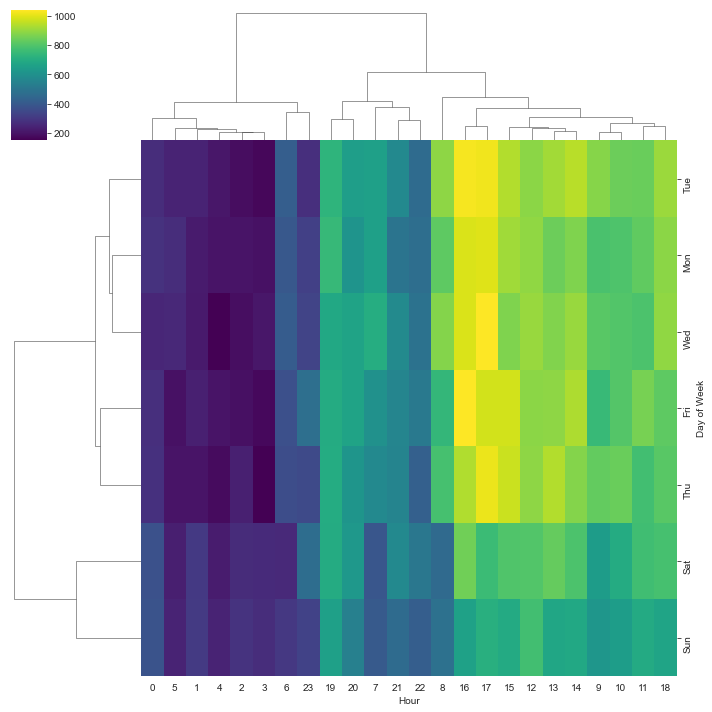

In [216]:
# Seaborn Clustermap. Around 5 PM during weekdays gets a lot of 911 calls

plt.figure(figsize=(12,6))
sns.clustermap(df2, cmap='viridis')

In [218]:
# Same DataFrame for Month

df3=df.groupby(by=['Day of Week', 'Month']).count()['Reason'].unstack()
df3

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

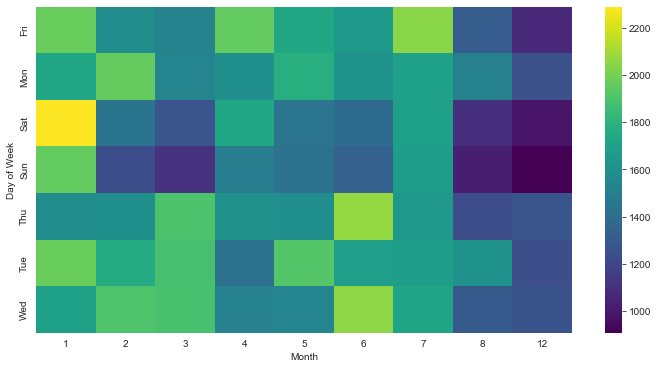

In [221]:
#Saturday in January and Wednesdays and Thursdays in Jun  -highest volume of calls

plt.figure(figsize=(12,6))
sns.heatmap(df3, cmap='viridis')

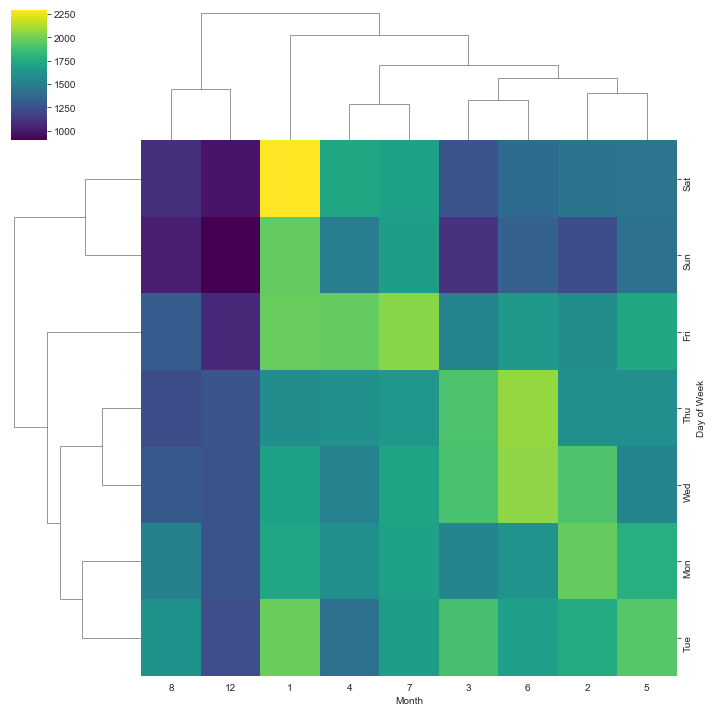

In [222]:
sns.clustermap(df3, cmap='viridis')